In [1]:
import numpy as np
import qiskit
import sys
sys.path.insert(1,'../')

import vqa.ansatz
import vqa.entanglement
import vqa.vqent

import matplotlib.pyplot as plt
import statistics

0.0028839999999999977 0.434174 0.46408 0.45614399999999994
[23. 15.  9.  1.  2.]


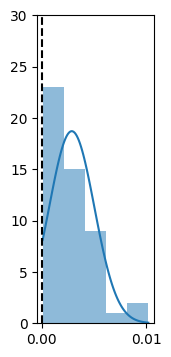

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, expon, poisson

data0 = [0.0050000000000000044, 0.00019999999999997797, 0.0031999999999999806, 0.0009000000000000119, 0.0021999999999999797, 0.009800000000000031, 0.0047000000000000375, 0.0021999999999999797, 0.0038000000000000256, 0.007000000000000006, 0.0019000000000000128, 0.00039999999999995595, 0.0040999999999999925, 0.00539999999999996, 0.0020000000000000018, 0.0024999999999999467, 0.00029999999999996696, 0.0036000000000000476, 0.0014999999999999458, 0.0020000000000000018, 0.0020000000000000018, 0.0021999999999999797, 0.010199999999999987, 0.0043999999999999595, 0.0020000000000000018, 0.0047000000000000375, 0.0026000000000000467, 0.0040999999999999925, 0.0010999999999999899, 0.0020000000000000018, 0.0020000000000000018, 0.005700000000000038, 0.0016000000000000458, 0.00039999999999995595, 0.0023999999999999577, 0.0032999999999999696, 0.0041999999999999815, 0.0030000000000000027, 0.0018000000000000238, 0.0010000000000000009, 9.999999999998899e-05, 0.0020000000000000018, 0.0043999999999999595, 0.0008000000000000229, 0.0021999999999999797, 0.0026000000000000467, 0.0020999999999999908, 0.0009000000000000119, 0.005099999999999993, 0.0006000000000000449]
datastar = [0.45589999999999997, 0.44989999999999997, 0.42989999999999995, 0.43989999999999996, 0.4395, 0.4334, 0.43500000000000005, 0.4538, 0.4303, 0.42910000000000004, 0.43879999999999997, 0.4282, 0.4113, 0.43710000000000004, 0.4384, 0.43899999999999995, 0.4354, 0.4365, 0.4324, 0.4286, 0.4374, 0.39270000000000005, 0.4292, 0.44430000000000003, 0.4366, 0.4384, 0.43810000000000004, 0.41659999999999997, 0.46020000000000005, 0.43400000000000005, 0.4223, 0.43810000000000004, 0.41979999999999995, 0.4283, 0.44730000000000003, 0.4285, 0.4315, 0.42200000000000004, 0.4383, 0.4344, 0.44489999999999996, 0.4145, 0.4484, 0.43320000000000003, 0.43879999999999997, 0.44789999999999996, 0.4282, 0.42610000000000003, 0.42310000000000003, 0.44320000000000004]
datamax = [0.44699999999999995, 0.47940000000000005, 0.4879, 0.4236, 0.4317, 0.4869, 0.47919999999999996, 0.4548, 0.4393, 0.43820000000000003, 0.47050000000000003, 0.4861, 0.45940000000000003, 0.4809, 0.4356, 0.4809, 0.4515, 0.4655, 0.4374, 0.45830000000000004, 0.4526, 0.492, 0.4589, 0.4669, 0.48429999999999995, 0.4686, 0.4565, 0.46319999999999995, 0.489, 0.41269999999999996, 0.48340000000000005, 0.45840000000000003, 0.4375, 0.4675, 0.4788, 0.48240000000000005, 0.47809999999999997, 0.45920000000000005, 0.47319999999999995, 0.4363, 0.48650000000000004, 0.46950000000000003, 0.4647, 0.44430000000000003, 0.4567, 0.4871, 0.45999999999999996, 0.48929999999999996, 0.48319999999999996, 0.46909999999999996]
data1 = [0.4576, 0.4575, 0.4498, 0.3546, 0.47309999999999997, 0.46730000000000005, 0.4635, 0.4716, 0.4014, 0.46120000000000005, 0.4397, 0.45099999999999996, 0.47019999999999995, 0.49739999999999995, 0.45709999999999995, 0.4871, 0.4806, 0.46120000000000005, 0.4555, 0.4797, 0.4524, 0.4699, 0.37539999999999996, 0.4627, 0.484, 0.4364, 0.47, 0.4404, 0.4888, 0.43520000000000003, 0.4899, 0.44789999999999996, 0.4537, 0.49839999999999995, 0.4414, 0.4285, 0.43710000000000004, 0.46719999999999995, 0.4589, 0.4878, 0.46020000000000005, 0.4395, 0.44310000000000005, 0.4746, 0.4627, 0.44799999999999995, 0.45589999999999997, 0.43220000000000003, 0.45320000000000005, 0.4747]


# Calculate the average value
avg0 = np.mean(data0)
avgstar = np.mean(datastar)
avgsmax = np.mean(datamax)
avg1 = np.mean(data1)
print(avg0,avgstar,avgsmax,avg1)

plt.figure(figsize = (1.5,4))


(mu0, sigma0) = norm.fit(data0)
x0 = np.linspace(min(data0), max(data0), 100)

values0, bins0, _ = plt.hist(data0, bins=5,density=False,alpha=0.5,color ='C0')
area0 = sum(np.diff(bins0) * values0)

print(values0)

plt.plot(x0, norm.pdf(x0, mu0, sigma0) * area0, 'C0-')
plt.axvline(x = 0, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_star_0.svg", format="svg",transparent=True)
plt.show()

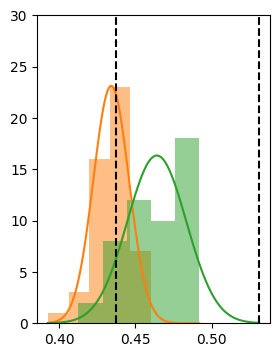

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize = (3,4))


(mustar, sigmastar) = norm.fit(datastar)
xstar = np.linspace(min(datastar), max(datamax), 100) #max of datamax
(mumax, sigmamax) = norm.fit(datamax)
xmax = np.linspace(min(datastar), 0.53125, 100) #min of star


valuestar, binstar, _ = plt.hist(datastar, bins=5,density=False,alpha=0.5,color ='C1')
areastar = sum(np.diff(binstar) * valuestar)

valuesmax, binsmax, _ = plt.hist(datamax, bins=5,density=False,alpha=0.5,color ='C2')
areamax = sum(np.diff(binsmax) * valuesmax)

plt.plot(xstar, norm.pdf(xstar, mustar, sigmastar) * areastar, 'C1-')
plt.plot(xmax, norm.pdf(xmax, mumax, sigmamax) * areamax, 'C2-')

plt.axvline(x = 0.4375, color = 'black',linestyle = '--')
plt.axvline(x = 0.53125, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_star_1.svg", format="svg",transparent=True)
plt.show()

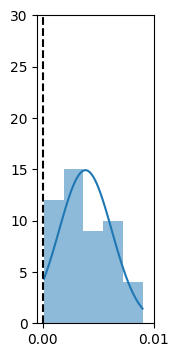

In [42]:
# poly plot
data0 = [0.0049000000000000155, 0.0046000000000000485, 0.0016000000000000458, 0.005199999999999982, 0.009000000000000008, 0.0011999999999999789, 0.0039000000000000146, 0.0019000000000000128, 0.0044999999999999485, 0.0031999999999999806, 0.0050000000000000044, 0.009000000000000008, 0.005900000000000016, 9.999999999998899e-05, 0.00649999999999995, 0.005900000000000016, 0.0023999999999999577, 0.0020999999999999908, 0.006800000000000028, 0.0022999999999999687, 0.0021999999999999797, 0.0032999999999999696, 0.007099999999999995, 0.0009000000000000119, 0.0030000000000000027, 0.0041999999999999815, 0.0012999999999999678, 0.0018000000000000238, 0.006900000000000017, 0.0010000000000000009, 0.0042999999999999705, 0.0027000000000000357, 0.0028000000000000247, 0.0009000000000000119, 9.999999999998899e-05, 0.0016000000000000458, 0.0024999999999999467, 0.0019000000000000128, 0.007499999999999951, 0.007199999999999984, 0.0028000000000000247, 0.0032999999999999696, 0.007099999999999995, 0.0011999999999999789, 0.007399999999999962, 0.00660000000000005, 0.0049000000000000155, 0.0022999999999999687, 0.005700000000000038, 0.0016000000000000458]
datapoly = [0.42800000000000005, 0.4393, 0.44410000000000005, 0.4316, 0.43700000000000006, 0.43489999999999995, 0.4276, 0.4202, 0.42969999999999997, 0.4497, 0.43520000000000003, 0.4232, 0.4113, 0.4175, 0.4517, 0.43410000000000004, 0.4357, 0.4345, 0.39359999999999995, 0.4346, 0.45430000000000004, 0.4303, 0.4345, 0.43589999999999995, 0.43310000000000004, 0.43510000000000004, 0.4112, 0.4505, 0.4333, 0.4405, 0.4407, 0.4406, 0.4273, 0.4333, 0.4527, 0.43799999999999994, 0.4414, 0.44589999999999996, 0.4194, 0.44020000000000004, 0.4364, 0.4457, 0.43620000000000003, 0.43520000000000003, 0.42779999999999996, 0.43379999999999996, 0.42069999999999996, 0.44689999999999996, 0.43289999999999995, 0.43779999999999997]
datamax

plt.figure(figsize = (1.5,4))
(mu0, sigma0) = norm.fit(data0)
x0 = np.linspace(min(data0), max(data0), 100)

values0, bins0, _ = plt.hist(data0, bins=5,density=False,alpha=0.5,color ='C0')
area0 = sum(np.diff(bins0) * values0)

plt.plot(x0, norm.pdf(x0, mu0, sigma0) * area0, 'C0-')
plt.axvline(x = 0, color = 'black',linestyle = '--')
plt.ylim(0,30)
plt.xlim(-0.0005,0.01)

plt.savefig("CE_poly_0.svg", format="svg",transparent=True)
plt.show()


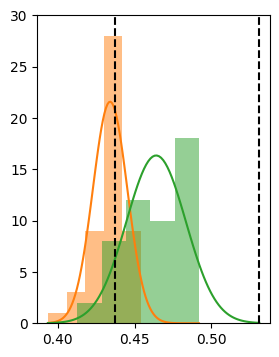

In [31]:
plt.figure(figsize = (3,4))

(mupoly, sigmapoly) = norm.fit(datapoly)
xpoly = np.linspace(min(datapoly), max(datamax), 100)
(mumax, sigmamax) = norm.fit(datamax)
xmax = np.linspace(min(datapoly), 0.53125, 100)

valuepoly, binpoly, _ = plt.hist(datapoly, bins=5,density=False,alpha=0.5,color ='C1')
areapoly = sum(np.diff(binpoly) * valuepoly)

valuesmax, binsmax, _ = plt.hist(datamax, bins=5,density=False,alpha=0.5,color ='C2')
areamax = sum(np.diff(binsmax) * valuesmax)

plt.plot(xpoly, norm.pdf(xpoly, mupoly, sigmapoly) * areapoly, 'C1-')
plt.plot(xmax, norm.pdf(xmax, mumax, sigmamax) * areamax, 'C2-')

plt.axvline(x = 0.4375, color = 'black',linestyle = '--')
plt.axvline(x = 0.53125, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_poly_1.svg", format="svg",transparent=True)
plt.show()

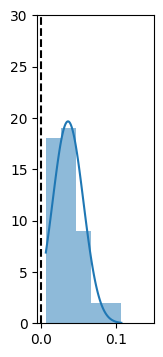

In [44]:
# plot for squeezing
data0 = [0.022199999999999998, 0.014000000000000012, 0.02959999999999996, 0.03390000000000004, 0.01770000000000005, 0.07140000000000002, 0.09199999999999997, 0.0353, 0.013599999999999945, 0.04510000000000003, 0.04400000000000004, 0.019199999999999995, 0.017000000000000015, 0.027100000000000013, 0.02859999999999996, 0.06610000000000005, 0.02290000000000003, 0.025499999999999967, 0.0474, 0.031100000000000017, 0.020299999999999985, 0.028200000000000003, 0.01090000000000002, 0.030399999999999983, 0.06979999999999997, 0.027800000000000047, 0.0514, 0.028299999999999992, 0.032299999999999995, 0.046499999999999986, 0.051000000000000045, 0.026800000000000046, 0.03739999999999999, 0.025399999999999978, 0.05259999999999998, 0.014700000000000046, 0.05379999999999996, 0.03959999999999997, 0.014000000000000012, 0.024399999999999977, 0.0353, 0.015100000000000002, 0.018299999999999983, 0.04849999999999999, 0.05289999999999995, 0.03869999999999996, 0.061000000000000054, 0.006299999999999972, 0.10699999999999998, 0.02200000000000002]
datasq = [0.4202, 0.4143, 0.43379999999999996, 0.42700000000000005, 0.4316, 0.4354, 0.4044, 0.4488, 0.42369999999999997, 0.46030000000000004, 0.4235, 0.4336, 0.4023, 0.44120000000000004, 0.4386, 0.4183, 0.4375, 0.44599999999999995, 0.4403, 0.43899999999999995, 0.43379999999999996, 0.4263, 0.4205, 0.42269999999999996, 0.42979999999999996, 0.41459999999999997, 0.4457, 0.4094, 0.4377, 0.41359999999999997, 0.4393, 0.4161, 0.40080000000000005, 0.4325, 0.4363, 0.41459999999999997, 0.44810000000000005, 0.42269999999999996, 0.4414, 0.43479999999999996, 0.4254, 0.43899999999999995, 0.4606, 0.42410000000000003, 0.43979999999999997, 0.4303, 0.42910000000000004, 0.43410000000000004, 0.42900000000000005, 0.45430000000000004]
datamax

plt.figure(figsize = (1.5,4))
(mu0, sigma0) = norm.fit(data0)
x0 = np.linspace(min(data0), max(data0), 100)

values0, bins0, _ = plt.hist(data0, bins=5,density=False,alpha=0.5,color ='C0')
area0 = sum(np.diff(bins0) * values0)

plt.plot(x0, norm.pdf(x0, mu0, sigma0) * area0, 'C0-')
plt.axvline(x = 0, color = 'black',linestyle = '--')
plt.ylim(0,30)
plt.xlim(-0.005,0.15)

plt.savefig("CE_sq_0.svg", format="svg",transparent=True)
plt.show()

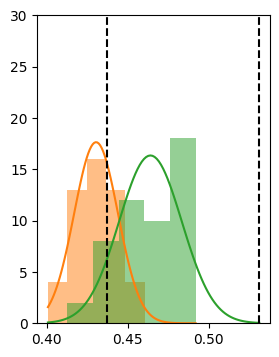

In [45]:
plt.figure(figsize = (3,4))

(musq, sigmasq) = norm.fit(datasq)
xsq = np.linspace(min(datasq), max(datamax), 100)
(mumax, sigmamax) = norm.fit(datamax)
xmax = np.linspace(min(datasq), 0.53125, 100)

valuesq, binsq, _ = plt.hist(datasq, bins=5,density=False,alpha=0.5,color ='C1')
areasq = sum(np.diff(binsq) * valuesq)

valuesmax, binsmax, _ = plt.hist(datamax, bins=5,density=False,alpha=0.5,color ='C2')
areamax = sum(np.diff(binsmax) * valuesmax)

plt.plot(xsq, norm.pdf(xsq, musq, sigmasq) * areasq, 'C1-')
plt.plot(xmax, norm.pdf(xmax, mumax, sigmamax) * areamax, 'C2-')

plt.axvline(x = 0.4375, color = 'black',linestyle = '--')
plt.axvline(x = 0.53125, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_sq_1.svg", format="svg",transparent=True)
plt.show()

***New fit***

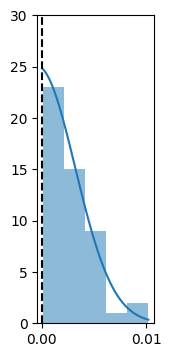

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

#star data
data0 = [0.0050000000000000044, 0.00019999999999997797, 0.0031999999999999806, 0.0009000000000000119, 0.0021999999999999797, 0.009800000000000031, 0.0047000000000000375, 0.0021999999999999797, 0.0038000000000000256, 0.007000000000000006, 0.0019000000000000128, 0.00039999999999995595, 0.0040999999999999925, 0.00539999999999996, 0.0020000000000000018, 0.0024999999999999467, 0.00029999999999996696, 0.0036000000000000476, 0.0014999999999999458, 0.0020000000000000018, 0.0020000000000000018, 0.0021999999999999797, 0.010199999999999987, 0.0043999999999999595, 0.0020000000000000018, 0.0047000000000000375, 0.0026000000000000467, 0.0040999999999999925, 0.0010999999999999899, 0.0020000000000000018, 0.0020000000000000018, 0.005700000000000038, 0.0016000000000000458, 0.00039999999999995595, 0.0023999999999999577, 0.0032999999999999696, 0.0041999999999999815, 0.0030000000000000027, 0.0018000000000000238, 0.0010000000000000009, 9.999999999998899e-05, 0.0020000000000000018, 0.0043999999999999595, 0.0008000000000000229, 0.0021999999999999797, 0.0026000000000000467, 0.0020999999999999908, 0.0009000000000000119, 0.005099999999999993, 0.0006000000000000449]
datastar = [0.45589999999999997, 0.44989999999999997, 0.42989999999999995, 0.43989999999999996, 0.4395, 0.4334, 0.43500000000000005, 0.4538, 0.4303, 0.42910000000000004, 0.43879999999999997, 0.4282, 0.4113, 0.43710000000000004, 0.4384, 0.43899999999999995, 0.4354, 0.4365, 0.4324, 0.4286, 0.4374, 0.39270000000000005, 0.4292, 0.44430000000000003, 0.4366, 0.4384, 0.43810000000000004, 0.41659999999999997, 0.46020000000000005, 0.43400000000000005, 0.4223, 0.43810000000000004, 0.41979999999999995, 0.4283, 0.44730000000000003, 0.4285, 0.4315, 0.42200000000000004, 0.4383, 0.4344, 0.44489999999999996, 0.4145, 0.4484, 0.43320000000000003, 0.43879999999999997, 0.44789999999999996, 0.4282, 0.42610000000000003, 0.42310000000000003, 0.44320000000000004]
datamax = [0.47640000000000005, 0.4867, 0.45909999999999995, 0.4585, 0.43720000000000003, 0.4709, 0.4848, 0.45109999999999995, 0.4555, 0.4857, 0.46120000000000005, 0.4649, 0.4796, 0.493, 0.4736, 0.4585, 0.47950000000000004, 0.4719, 0.44279999999999997, 0.4456, 0.45399999999999996, 0.47330000000000005, 0.48740000000000006, 0.44179999999999997, 0.4679, 0.4655, 0.4384, 0.4063, 0.49060000000000004, 0.4484, 0.4666, 0.473, 0.43479999999999996, 0.48629999999999995, 0.43520000000000003, 0.42500000000000004, 0.4433, 0.4536, 0.4579, 0.44720000000000004, 0.48619999999999997, 0.46209999999999996, 0.4514, 0.475, 0.45430000000000004, 0.47619999999999996, 0.4821, 0.48719999999999997, 0.47019999999999995, 0.47809999999999997]

plt.figure(figsize = (1.5,4))

data = data0
# Create a histogram of the data
bins = np.linspace(min(data), max(data), 6)

hist, bin_edges = np.histogram(data, bins=bins, density=False)

# Define the function to fit
def gaussian_func(x, amp, mean, std):
    return amp * norm.pdf(x, loc=mean, scale=std)

# Fit the data using curve_fit
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
params, _ = curve_fit(gaussian_func, bin_centers, hist, p0=[1, np.mean(data), np.std(data)])
amp_fit, mean_fit, std_fit = params

# Plot the histogram and fit
plt.hist(data, bins=bins, density=False, alpha=0.5)
x = np.linspace(min(data), max(data), 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C0-')
plt.axvline(x = 0, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_star_0.svg", format="svg",transparent=True)
plt.show()


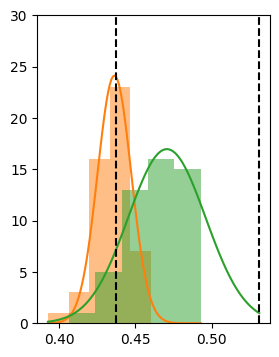

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

plt.figure(figsize = (3,4))

# Create a histogram of the data for star
binstar = np.linspace(min(datastar), max(datastar), 6) #max of datamax
histstar, binstar_edges = np.histogram(datastar, bins=binstar, density=False)

# Define the function to fit for star
def gaussian_func(x, amp, mean, std):
    return amp * norm.pdf(x, loc=mean, scale=std)

# Fit the data using curve_fit for star
binstar_centers = 0.5 * (binstar_edges[:-1] + binstar_edges[1:])
paramstar, _ = curve_fit(gaussian_func, binstar_centers, histstar, p0=[1, np.mean(datastar), np.std(datastar)])
amp_fit, mean_fit, std_fit = paramstar

# Plot the histogram and fit for star
plt.hist(datastar, bins=binstar, density=False, alpha=0.5, color ='C1')
x = np.linspace(min(datastar), max(datamax), 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C1-')
plt.ylim(0,35)

# Fit the data using curve_fit for max
binmax = np.linspace(min(datamax), max(datamax), 6) #max of datamax
histmax, binmax_edges = np.histogram(datamax, bins=binmax, density=False)

binmax_centers = 0.5 * (binmax_edges[:-1] + binmax_edges[1:])
parammax, _ = curve_fit(gaussian_func, binmax_centers, histmax, p0=[1, np.mean(datamax), np.std(datamax)],maxfev = 4000)
amp_fit, mean_fit, std_fit = parammax

# Plot the histogram and fit for max
plt.hist(datamax, bins=binmax, density=False, alpha=0.5, color ='C2')
x = np.linspace(min(datastar), 0.53125, 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C2-')


plt.axvline(x = 0.4375, color = 'black',linestyle = '--')
plt.axvline(x = 0.53125, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_star_1.svg", format="svg",transparent=True)
plt.show()

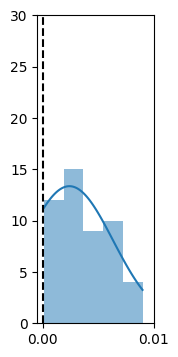

In [182]:
# POLY
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

#POLY data
data0 = [0.0049000000000000155, 0.0046000000000000485, 0.0016000000000000458, 0.005199999999999982, 0.009000000000000008, 0.0011999999999999789, 0.0039000000000000146, 0.0019000000000000128, 0.0044999999999999485, 0.0031999999999999806, 0.0050000000000000044, 0.009000000000000008, 0.005900000000000016, 9.999999999998899e-05, 0.00649999999999995, 0.005900000000000016, 0.0023999999999999577, 0.0020999999999999908, 0.006800000000000028, 0.0022999999999999687, 0.0021999999999999797, 0.0032999999999999696, 0.007099999999999995, 0.0009000000000000119, 0.0030000000000000027, 0.0041999999999999815, 0.0012999999999999678, 0.0018000000000000238, 0.006900000000000017, 0.0010000000000000009, 0.0042999999999999705, 0.0027000000000000357, 0.0028000000000000247, 0.0009000000000000119, 9.999999999998899e-05, 0.0016000000000000458, 0.0024999999999999467, 0.0019000000000000128, 0.007499999999999951, 0.007199999999999984, 0.0028000000000000247, 0.0032999999999999696, 0.007099999999999995, 0.0011999999999999789, 0.007399999999999962, 0.00660000000000005, 0.0049000000000000155, 0.0022999999999999687, 0.005700000000000038, 0.0016000000000000458]
datapoly = [0.42800000000000005, 0.4393, 0.44410000000000005, 0.4316, 0.43700000000000006, 0.43489999999999995, 0.4276, 0.4202, 0.42969999999999997, 0.4497, 0.43520000000000003, 0.4232, 0.4113, 0.4175, 0.4517, 0.43410000000000004, 0.4357, 0.4345, 0.39359999999999995, 0.4346, 0.45430000000000004, 0.4303, 0.4345, 0.43589999999999995, 0.43310000000000004, 0.43510000000000004, 0.4112, 0.4505, 0.4333, 0.4405, 0.4407, 0.4406, 0.4273, 0.4333, 0.4527, 0.43799999999999994, 0.4414, 0.44589999999999996, 0.4194, 0.44020000000000004, 0.4364, 0.4457, 0.43620000000000003, 0.43520000000000003, 0.42779999999999996, 0.43379999999999996, 0.42069999999999996, 0.44689999999999996, 0.43289999999999995, 0.43779999999999997]
datamax = [0.46409999999999996, 0.43600000000000005, 0.46419999999999995, 0.4415, 0.4809, 0.491, 0.46509999999999996, 0.4033, 0.48319999999999996, 0.4504, 0.486, 0.4798, 0.4779, 0.4585, 0.45109999999999995, 0.48650000000000004, 0.4766, 0.46699999999999997, 0.48939999999999995, 0.45699999999999996, 0.4719, 0.46330000000000005, 0.4366, 0.4839, 0.477, 0.45409999999999995, 0.47519999999999996, 0.4776, 0.4243, 0.4786, 0.47929999999999995, 0.47750000000000004, 0.4052, 0.45840000000000003, 0.4927, 0.5031, 0.4645, 0.4617, 0.4626, 0.4668, 0.4437, 0.49160000000000004, 0.4881, 0.4647, 0.4688, 0.45499999999999996, 0.4819, 0.45899999999999996, 0.4505, 0.4696]

plt.figure(figsize = (1.5,4))

data = data0
# Create a histogram of the data
bins = np.linspace(min(data), max(data), 6)
hist, bin_edges = np.histogram(data, bins=bins, density=False)

# Define the function to fit
def gaussian_func(x, amp, mean, std):
    return amp * norm.pdf(x, loc=mean, scale=std)

# Fit the data using curve_fit
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
params, _ = curve_fit(gaussian_func, bin_centers, hist, p0=[1, np.mean(data), np.std(data)], maxfev = 20000)
amp_fit, mean_fit, std_fit = params

# Plot the histogram and fit
plt.hist(data, bins=bins, density=False, alpha=0.5)
x = np.linspace(min(data), max(data), 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C0-')
plt.axvline(x = 0, color = 'black',linestyle = '--')

plt.ylim(0,30)
plt.xlim(-0.0005,0.01)

plt.savefig("CE_poly_0.svg", format="svg",transparent=True)
plt.show()

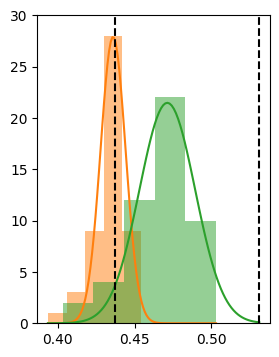

In [183]:
plt.figure(figsize = (3,4))

datastar = datapoly
 
# Create a histogram of the data for star
binstar = np.linspace(min(datastar), max(datastar), 6) #max of datamax
histstar, binstar_edges = np.histogram(datastar, bins=binstar, density=False)

# Define the function to fit for star
def gaussian_func(x, amp, mean, std):
    return amp * norm.pdf(x, loc=mean, scale=std)

# Fit the data using curve_fit for star
binstar_centers = 0.5 * (binstar_edges[:-1] + binstar_edges[1:])
paramstar, _ = curve_fit(gaussian_func, binstar_centers, histstar, p0=[1, np.mean(datastar), np.std(datastar)])
amp_fit, mean_fit, std_fit = paramstar

# Plot the histogram and fit for star
plt.hist(datastar, bins=binstar, density=False, alpha=0.5, color ='C1')
x = np.linspace(min(datastar), max(datamax), 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C1-')
plt.ylim(0,35)

# Fit the data using curve_fit for max
binmax = np.linspace(min(datamax), max(datamax), 6) #max of datamax
histmax, binmax_edges = np.histogram(datamax, bins=binmax, density=False)

binmax_centers = 0.5 * (binmax_edges[:-1] + binmax_edges[1:])
parammax, _ = curve_fit(gaussian_func, binmax_centers, histmax, p0=[1, np.mean(datamax), np.std(datamax)],maxfev = 4000)
amp_fit, mean_fit, std_fit = parammax

# Plot the histogram and fit for max
plt.hist(datamax, bins=binmax, density=False, alpha=0.5, color ='C2')
x = np.linspace(min(datastar), 0.53125, 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C2-')


plt.axvline(x = 0.4375, color = 'black',linestyle = '--')
plt.axvline(x = 0.53125, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_poly_1.svg", format="svg",transparent=True)
plt.show()

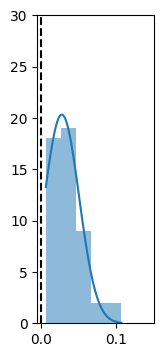

In [1]:
# SQEEZING
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

#SQUEEZ data
# plot for squeezing
data0 = [0.022199999999999998, 0.014000000000000012, 0.02959999999999996, 0.03390000000000004, 0.01770000000000005, 0.07140000000000002, 0.09199999999999997, 0.0353, 0.013599999999999945, 0.04510000000000003, 0.04400000000000004, 0.019199999999999995, 0.017000000000000015, 0.027100000000000013, 0.02859999999999996, 0.06610000000000005, 0.02290000000000003, 0.025499999999999967, 0.0474, 0.031100000000000017, 0.020299999999999985, 0.028200000000000003, 0.01090000000000002, 0.030399999999999983, 0.06979999999999997, 0.027800000000000047, 0.0514, 0.028299999999999992, 0.032299999999999995, 0.046499999999999986, 0.051000000000000045, 0.026800000000000046, 0.03739999999999999, 0.025399999999999978, 0.05259999999999998, 0.014700000000000046, 0.05379999999999996, 0.03959999999999997, 0.014000000000000012, 0.024399999999999977, 0.0353, 0.015100000000000002, 0.018299999999999983, 0.04849999999999999, 0.05289999999999995, 0.03869999999999996, 0.061000000000000054, 0.006299999999999972, 0.10699999999999998, 0.02200000000000002]
datasq = [0.4202, 0.4143, 0.43379999999999996, 0.42700000000000005, 0.4316, 0.4354, 0.4044, 0.4488, 0.42369999999999997, 0.46030000000000004, 0.4235, 0.4336, 0.4023, 0.44120000000000004, 0.4386, 0.4183, 0.4375, 0.44599999999999995, 0.4403, 0.43899999999999995, 0.43379999999999996, 0.4263, 0.4205, 0.42269999999999996, 0.42979999999999996, 0.41459999999999997, 0.4457, 0.4094, 0.4377, 0.41359999999999997, 0.4393, 0.4161, 0.40080000000000005, 0.4325, 0.4363, 0.41459999999999997, 0.44810000000000005, 0.42269999999999996, 0.4414, 0.43479999999999996, 0.4254, 0.43899999999999995, 0.4606, 0.42410000000000003, 0.43979999999999997, 0.4303, 0.42910000000000004, 0.43410000000000004, 0.42900000000000005, 0.45430000000000004]
datamax = [0.45189999999999997, 0.47850000000000004, 0.45720000000000005, 0.473, 0.4709, 0.44789999999999996, 0.46099999999999997, 0.4827, 0.4615, 0.44810000000000005, 0.47230000000000005, 0.46109999999999995, 0.46430000000000005, 0.4759, 0.46220000000000006, 0.471, 0.4444, 0.4404, 0.4786, 0.44179999999999997, 0.47109999999999996, 0.4555, 0.41910000000000003, 0.44530000000000003, 0.4485, 0.46440000000000003, 0.4696, 0.46699999999999997, 0.44620000000000004, 0.4729, 0.47850000000000004, 0.46240000000000003, 0.45020000000000004, 0.4615, 0.44910000000000005, 0.4678, 0.4595, 0.46699999999999997, 0.48760000000000003, 0.46740000000000004, 0.47929999999999995, 0.46819999999999995, 0.4437, 0.4818, 0.4796, 0.4776, 0.46599999999999997, 0.4778, 0.4769, 0.4608]

plt.figure(figsize = (1.5,4))

data = data0
# Create a histogram of the data
bins = np.linspace(min(data), max(data), 6)
hist, bin_edges = np.histogram(data, bins=bins, density=False)

# Define the function to fit
def gaussian_func(x, amp, mean, std):
    return amp * norm.pdf(x, loc=mean, scale=std)

# Fit the data using curve_fit
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
params, _ = curve_fit(gaussian_func, bin_centers, hist, p0=[1, np.mean(data), np.std(data)], maxfev = 1000)
amp_fit, mean_fit, std_fit = params

# Plot the histogram and fit
plt.hist(data, bins=bins, density=False, alpha=0.5)
x = np.linspace(min(data), max(data), 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C0-')
plt.axvline(x = 0, color = 'black',linestyle = '--')

plt.ylim(0,30)
plt.xlim(-0.005,0.15)

plt.savefig("CE_sq_0.svg", format="svg",transparent=True)
plt.show()

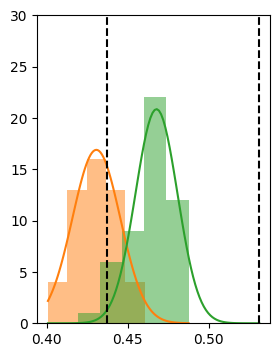

In [2]:
plt.figure(figsize = (3,4))

datastar = datasq
 
# Create a histogram of the data for star
binstar = np.linspace(min(datastar), max(datastar), 6) #max of datamax
histstar, binstar_edges = np.histogram(datastar, bins=binstar, density=False)

# Define the function to fit for star
def gaussian_func(x, amp, mean, std):
    return amp * norm.pdf(x, loc=mean, scale=std)

# Fit the data using curve_fit for star
binstar_centers = 0.5 * (binstar_edges[:-1] + binstar_edges[1:])
paramstar, _ = curve_fit(gaussian_func, binstar_centers, histstar, p0=[1, np.mean(datastar), np.std(datastar)])
amp_fit, mean_fit, std_fit = paramstar

# Plot the histogram and fit for star
plt.hist(datastar, bins=binstar, density=False, alpha=0.5, color ='C1')
x = np.linspace(min(datastar), max(datamax), 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C1-')
plt.ylim(0,35)

# Fit the data using curve_fit for max
binmax = np.linspace(min(datamax), max(datamax), 6) #max of datamax
histmax, binmax_edges = np.histogram(datamax, bins=binmax, density=False)

binmax_centers = 0.5 * (binmax_edges[:-1] + binmax_edges[1:])
parammax, _ = curve_fit(gaussian_func, binmax_centers, histmax, p0=[1, np.mean(datamax), np.std(datamax)],maxfev = 4000)
amp_fit, mean_fit, std_fit = parammax

# Plot the histogram and fit for max
plt.hist(datamax, bins=binmax, density=False, alpha=0.5, color ='C2')
x = np.linspace(min(datastar), 0.53125, 100)
plt.plot(x, gaussian_func(x, amp_fit, mean_fit, std_fit), 'C2-')


plt.axvline(x = 0.4375, color = 'black',linestyle = '--')
plt.axvline(x = 0.53125, color = 'black',linestyle = '--')
plt.ylim(0,30)

plt.savefig("CE_sq_1.svg", format="svg",transparent=True)
plt.show()